# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
prevrenda = pd.read_csv('Previsao_de_renda.csv').dropna()
prevrenda

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


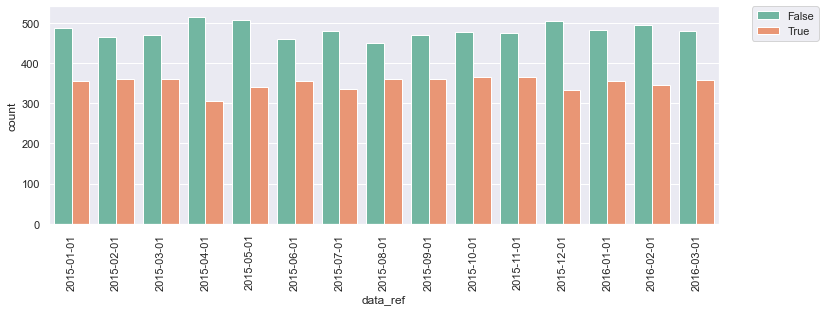

In [147]:
plt.figure(figsize=(12,4))

ax = sns.countplot(x='data_ref', hue = 'posse_de_veiculo', data=prevrenda, palette='Set2')

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



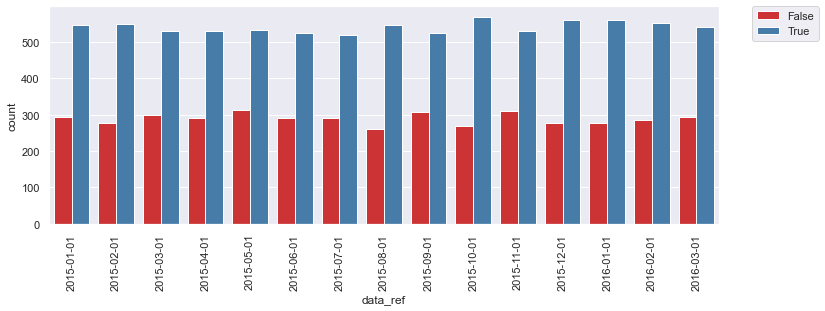

In [148]:
plt.figure(figsize=(12,4))

ax = sns.countplot(x='data_ref', hue = 'posse_de_imovel', data=prevrenda, palette='Set1')

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

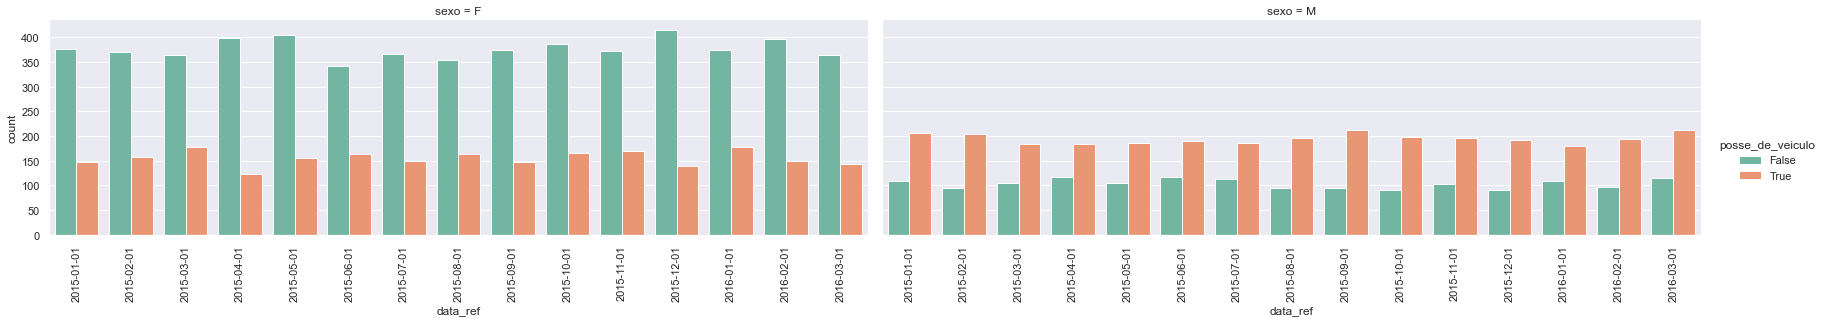

In [149]:
veiculo = sns.catplot(x="data_ref", hue="posse_de_veiculo", col="sexo",
                data=prevrenda, kind="count", palette='Set2',
                height=4, aspect=3)

veiculo.set_xticklabels(ax.get_xticklabels(), rotation=90)

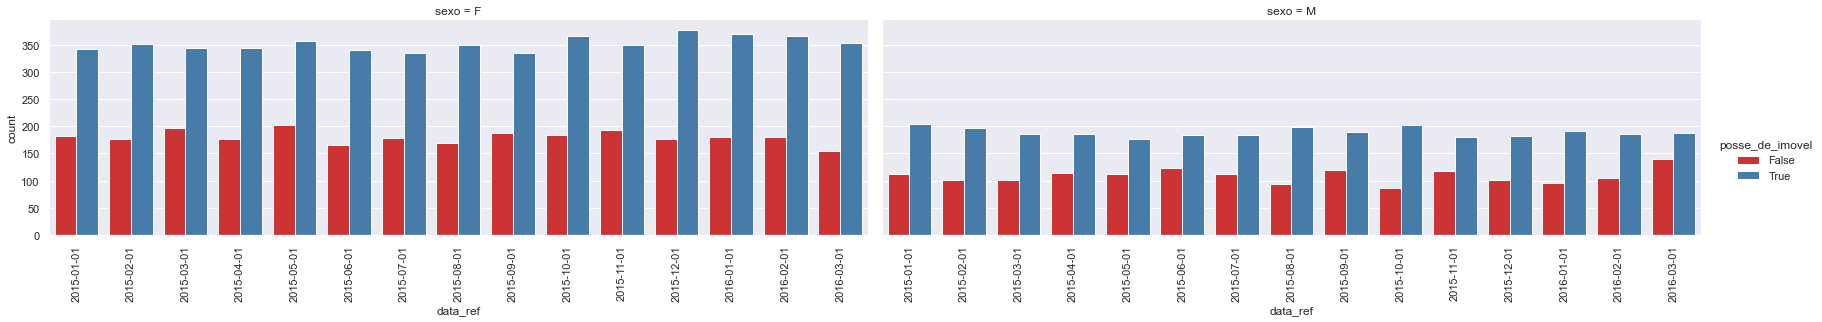

In [150]:
imovel = sns.catplot(x="data_ref", hue="posse_de_imovel", col="sexo",
                data=prevrenda, kind="count", palette='Set1',
                height=4, aspect=3)

imovel.set_xticklabels(ax.get_xticklabels(), rotation=90)

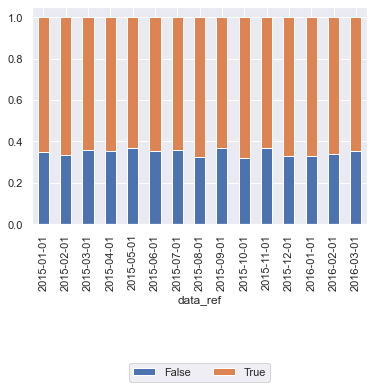

In [151]:
tab_imovel = pd.crosstab(prevrenda['data_ref'],prevrenda['posse_de_imovel'])
tab_a = tab_imovel.div(tab_imovel.sum(axis = 1), axis = 0)

ax = tab_a.plot.bar(stacked = True)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.75),ncol = 3)

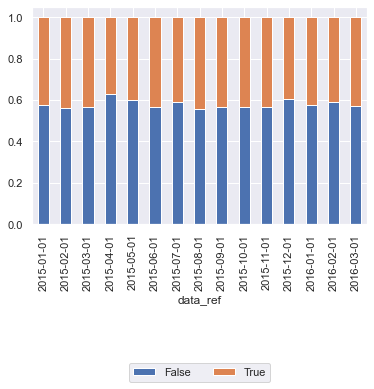

In [152]:
tab_veiculo = pd.crosstab(prevrenda['data_ref'],prevrenda['posse_de_veiculo'])
tab_b = tab_veiculo.div(tab_veiculo.sum(axis = 1), axis = 0)

ax = tab_b.plot.bar(stacked = True)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.75),ncol = 3)

### *Acredito que não houve alterações importantes ao longo do tempo com as variáveis qualitativas, tanto nos gráficos ao longo do tempo, separei por sexo, quanto no gráfico de barra empilhada.*

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

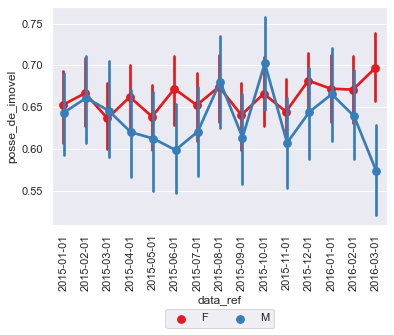

In [161]:
ax = sns.pointplot(x='data_ref', y='posse_de_imovel', hue = 'sexo',
                   data=prevrenda, dodge=True, ci = 95, palette='Set1')


ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

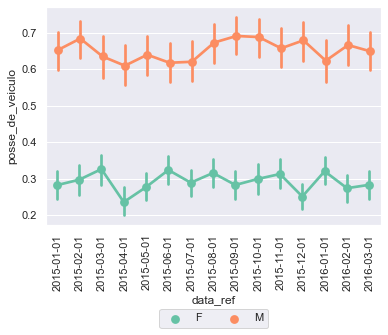

In [158]:
ax = sns.pointplot(x='data_ref', y='posse_de_veiculo', hue = 'sexo',
                   data=prevrenda, dodge=True, ci = 95, palette='Set2')


ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

### *Acredito que no gráfico, onde a variável posse_de_imóvel ao longo do tempo existe uma instabilidade para o sexo masculino, e para o feminino manteve ao longo do período menos instavel, ja para o segundo gráfico, tanto para masculino quanto feminino, as médias são mais estáveis, não tendo alterações importantes.*